# Introduction

Hello people, welcome to this kernel. In this kernel I am going to examine the indian food 101 dataset, I will do some EDA and machine learning. Before starting, let's take a look at the content

# Content
1. Importing All The Things
1. Data Overview
1. Feature Engineering / Ingredients
1. Random Color Function
1. Simple Data Analyses
    * Distribution Of Diet
    * Distribution Of Preparation Time
    * Distribution Of Cook Time
    * Distribution Of Flavor Profile
    * Distribution of Course
    * Distribution Of State
    * Distribution Of Region
1. Detailed Data Analyses
    * Correlation Between Preparation Time and Cook Time
    * Detailed Analyses: Diet
1. Data Preprocessing
1. Machine Learning
1. Conclusion

# Importing All The Things

In this section I am gonna import all the things that I will use in the EDA.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-101/indian_food.csv


In [2]:
data = pd.read_csv('/kaggle/input/indian-food-101/indian_food.csv')

In [3]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


# Data Overview

In this section I am going to take a look at the data.

In [4]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


* There are 9 features in the dataset. 
* 7 of them are object and 2 of them are numerical


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


* There are 255 foods in this dataset.

In [6]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

* There is only one missing value in the dataset. We can fill it easily.

# Feature Engineering / Ingredients

In this section I am going to handle the ingredients feature, before starting let's take a look at that.

In [7]:
data.ingredients[0]

'Maida flour, yogurt, oil, sugar'

In [8]:
data.ingredients[1]

'Gram flour, ghee, sugar'

In [9]:
data.ingredients[2]

'Carrots, milk, sugar, ghee, cashews, raisins'

* As we can see, materials seperated with seperator. So we can easily split them.

1. First, I will determine all unique materials.

In [10]:
material_list = []
for material_string in data.ingredients:
    
    material_string = material_string.lower()
    materials = material_string.split(",")
    materials = [material.strip() for material in materials]
    for material in materials:
        
        if material not in material_list:
            material_list.append(material)
            

print("There are {} unique materials in the dataset".format(len(material_list)))


There are 365 unique materials in the dataset


* 417. Such a number!
* Let's take a look at the materials

In [11]:
print(material_list[:20])

['maida flour', 'yogurt', 'oil', 'sugar', 'gram flour', 'ghee', 'carrots', 'milk', 'cashews', 'raisins', 'flour', 'kewra', 'clarified butter', 'almonds', 'pistachio', 'saffron', 'green cardamom', 'milk powder', 'plain flour', 'baking powder']


2. Now I am going to convert each ingredients string to sparse matrix. 

In [12]:
matrix_list = []

for material in material_list:
    column = []
    for ingredient in data.ingredients:
        
        ingredient = ingredient.lower().replace(","," ")
        
        
        if material in ingredient:
            column.append(1)
        else:
            column.append(0)
            
    matrix_list.append(column)

* let's take a look at the matrix

In [13]:
material_matrix = np.array(matrix_list)
print("Shape of material_matrix is {}".format(material_matrix.shape))

Shape of material_matrix is (365, 255)


In [14]:
print(material_matrix[0])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


* Now I am going to convert this matrix to pandas dataframe.

In [15]:
material_df = pd.DataFrame(material_matrix.T)
material_df.columns = material_list
material_df.head()

,maida flour,yogurt,oil,sugar,gram flour,ghee,carrots,milk,cashews,raisins,...,soaked rice,cardamom pods,red pepper,watercress,glutinous rice,egg yolks,dry dates,dried rose petals,arrowroot powder,ginger powder
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


* For this moment, I am not going to add this dataset, into our dataset. But we will use this.

In [16]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


# Random Color Function

In this section I am going to define a function that creates random colors. I will use this function when I start the data analyses.

In [17]:
import random
def random_color(number):
    color_li = []
    for i in range(number):
        R = str(random.randint(0,255))
        G = str(random.randint(0,255))
        B = str(random.randint(0,255))
        A = "0.7"
        STRING = "rgba({},{},{},{})".format(R,G,B,A)
        color_li.append(STRING)
    return color_li
    

In [18]:
random_color(1)

['rgba(161,81,69,0.7)']

# Simple Data Analyses

In this section, I am going to examine the distribution of all the features. Let's start with diet.

## Distribution Of Diet

In [19]:
trace1 = go.Bar(x=data.diet.value_counts().index
          ,y=data.diet.value_counts().values
          ,marker=dict(color=random_color(len(data.diet.value_counts())))
          )

layout = go.Layout(title="Distribution - Diet",
                   xaxis=dict(title="Diet Type")
                  ,yaxis=dict(title="Count"))


figure = go.Figure(data=trace1,layout=layout)
iplot(figure)

* Most of the foods are vegetarian.

# Distrubution Of Preparation Time


In [20]:
trace1 = go.Histogram(x=data.prep_time,
                      marker=dict(color="blue"),
                     )

layout = go.Layout(title="Histogram Of Preparation Time",
                   xaxis=dict(title="Preparation Time"),
                   yaxis=dict(title="Count")
                  )

figure = go.Figure(data=trace1,layout=layout)
iplot(figure)

* Although most of the foods' preparation time is less than 100 minutes, there are the foods that have preparation time higher than 200.

# Distribution Of Cook Time


In [21]:
trace1 = go.Histogram(x=data.cook_time,
                      marker=dict(color="green"),
                     )

layout = go.Layout(title="Histogram Of Cook Time",
                   xaxis=dict(title="Cook Time"),
                   yaxis=dict(title="Count")
                  )

figure = go.Figure(data=trace1,layout=layout)
iplot(figure)

* Most of the foods' cook time is less than 100
* There is an interesting food that have cook time 700 minutes. It equals 11.5 hours.

# Distribution Of Flavor Profile

In [22]:
trace1 = go.Bar(x=data.flavor_profile.value_counts().index
          ,y=data.flavor_profile.value_counts().values
          ,marker=dict(color=random_color(len(data.flavor_profile.value_counts())))
          )

layout = go.Layout(title="Distribution - Flavor Profile",
                   xaxis=dict(title="Flavor Profile")
                  ,yaxis=dict(title="Count"))


figure = go.Figure(data=trace1,layout=layout)
iplot(figure)

* What? There is a flavor profile named -1.
* Most of the dataset is spicy and sweet.
* Everyone knows that. In India, people like spicy tastes


# Distribution of Course

In [23]:
trace1 = go.Bar(x=data.course.value_counts().index
          ,y=data.course.value_counts().values
          ,marker=dict(color=random_color(len(data.course.value_counts())))
          )

layout = go.Layout(title="Distribution - Course",
                   xaxis=dict(title="Course Type")
                  ,yaxis=dict(title="Count"))


figure = go.Figure(data=trace1,layout=layout)
iplot(figure)

* Most of the foods are main course.
* Starters are really rare.


# Distribution Of State


In [24]:
trace1 = go.Bar(x=data.state.value_counts().index
          ,y=data.state.value_counts().values
          ,marker=dict(color=random_color(len(data.state.value_counts())))
          )

layout = go.Layout(title="Distribution - State",
                   xaxis=dict(title="State Name")
                  ,yaxis=dict(title="Number Of Foods"))


figure = go.Figure(data=trace1,layout=layout)
iplot(figure)

* Again -1. I guess data collector named missing values as -1.
* Gujarat,Punjab,Maharashtra are good places to try something new.

# Distribution Of Region

In [25]:
trace1 = go.Bar(x=data.region.value_counts().index
          ,y=data.region.value_counts().values
          ,marker=dict(color=random_color(len(data.region.value_counts())))
          )

layout = go.Layout(title="Distribution - Region",
                   xaxis=dict(title="Region Name")
                  ,yaxis=dict(title="Number Of Foods"))


figure = go.Figure(data=trace1,layout=layout)
iplot(figure)

* Most of the indian cousine came from West and South.

# Detailed Data Analyses

## Correlation Between Preparation Time and Cook Time

In [26]:
data.corr()

,prep_time,cook_time
prep_time,1.000000,0.144113
cook_time,0.144113,1.000000


* We can say that, correlation between preparation time and cook time is not high enough to be significant.

# Detailed Analyses: Diet

In [27]:
data.groupby("diet").mean()

,prep_time,cook_time
diet,,
non vegetarian,27.068966,25.862069
vegetarian,31.623894,35.641593


* Vegetarian foods' preparation and cook time is shorter than non vegetarian foods. 
* So we can use this features in machine learning.

In [28]:
veg_foods = data[data.diet=="vegetarian"]
non_veg_foods = data[data.diet=="non vegetarian"]



In [29]:
veg_foods.flavor_profile.value_counts()

spicy     107
sweet      88
-1         26
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [30]:
non_veg_foods.flavor_profile.value_counts()

spicy    26
-1        3
Name: flavor_profile, dtype: int64

* We can say that if a food is not vegetarian, its flavor profile must be spicy.
* But in vegetarian foods, we can't say anything.

In [31]:
veg_foods.course.value_counts()

main course    102
dessert         85
snack           39
Name: course, dtype: int64

In [32]:
non_veg_foods.course.value_counts()

main course    27
starter         2
Name: course, dtype: int64

* Most of the non vegetarian foods are main course.
* There is no non vegetarian dessert or snack, all of them are vegetarian.
* There is no vegetarian starter.
* We can use this feature in machine learning.


In [33]:
veg_foods.state.value_counts()

Gujarat            35
Punjab             28
Maharashtra        28
-1                 24
West Bengal        19
Tamil Nadu         19
Assam              11
Andhra Pradesh     10
Uttar Pradesh       9
Odisha              7
Kerala              7
Karnataka           6
Rajasthan           6
Telangana           4
Bihar               3
Madhya Pradesh      2
Goa                 2
Jammu & Kashmir     2
Manipur             1
Uttarakhand         1
Chhattisgarh        1
Haryana             1
Name: state, dtype: int64

In [34]:
non_veg_foods.state.value_counts()

Assam           10
West Bengal      5
Punjab           4
Maharashtra      2
Telangana        1
Goa              1
Kerala           1
Nagaland         1
Tripura          1
Manipur          1
NCT of Delhi     1
Tamil Nadu       1
Name: state, dtype: int64

In [35]:
veg_foods.region.value_counts()

West          71
South         56
North         44
East          26
-1            13
North East    12
Central        3
Name: region, dtype: int64

In [36]:
non_veg_foods.region.value_counts()

North East    13
North          5
East           5
West           3
South          3
Name: region, dtype: int64

# Data Preprocessing

In this section I am going to process the dataset. Let's start.

In [37]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


* First, I will drop the ingredients feature because I will add the ingredients sparse matrix.

In [38]:
data.drop("ingredients",axis=1,inplace=True)
data.head()

,name,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,vegetarian,15,40,sweet,dessert,West Bengal,East


* Name is unrelevant. We can drop it.

In [39]:
data.drop("name",axis=1,inplace=True)
data.head()

,diet,prep_time,cook_time,flavor_profile,course,state,region
0,vegetarian,45,25,sweet,dessert,West Bengal,East
1,vegetarian,80,30,sweet,dessert,Rajasthan,West
2,vegetarian,15,60,sweet,dessert,Punjab,North
3,vegetarian,15,30,sweet,dessert,Rajasthan,West
4,vegetarian,15,40,sweet,dessert,West Bengal,East


* Now I am going to convert diet feature to 0 and 1. If the food is vegetarian, its diet will be 0 else it will be 1.

In [40]:
diet_li = []

for diet in data.diet:
    
    if diet == "vegetarian":
        diet_li.append(1)
    else:
        diet_li.append(0)
        
        
data.diet = diet_li

In [41]:
data.head()

,diet,prep_time,cook_time,flavor_profile,course,state,region
0,1,45,25,sweet,dessert,West Bengal,East
1,1,80,30,sweet,dessert,Rajasthan,West
2,1,15,60,sweet,dessert,Punjab,North
3,1,15,30,sweet,dessert,Rajasthan,West
4,1,15,40,sweet,dessert,West Bengal,East


* Let's encode flavor_profile,course,state and region.

In [42]:
data = pd.get_dummies(data=data,columns=["flavor_profile","course","state","region"])
data.head()

,diet,prep_time,cook_time,flavor_profile_-1,flavor_profile_bitter,flavor_profile_sour,flavor_profile_spicy,flavor_profile_sweet,course_dessert,course_main course,...,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal,region_-1,region_Central,region_East,region_North,region_North East,region_South,region_West
0,1,45,25,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
1,1,80,30,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,15,60,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,15,30,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,15,40,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0


* Now I am going to add add our ingredients sparce matrix.

In [43]:
data = pd.concat([data,material_df],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Columns: 409 entries, diet to ginger powder
dtypes: int64(368), uint8(41)
memory usage: 743.5 KB


* Now I am going to split the data to train and test.

In [44]:
from sklearn.model_selection import train_test_split
x = data.drop("diet",axis=1)
y = data.diet

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)



In [45]:
print("x_train's shape is",x_train.shape)
print("x_test's shape is",x_test.shape)
print("y_train's shape is",y_train.shape)
print("y_test's. shape is ",y_test.shape)

x_train's shape is (204, 408)
x_test's shape is (51, 408)
y_train's shape is (204,)
y_test's. shape is  (51,)


* Now I am going to split train set to train and validation.

In [46]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=1)

# Machine Learning

In this section I am going to classify foods by their diet type. As machine learning model, I will use Logistic Regression.

In [47]:
import warnings as wrn
from sklearn.linear_model import LogisticRegression

wrn.filterwarnings('ignore')
LR = LogisticRegression()
LR.fit(x_train,y_train)
print("Validation score is",LR.score(x_val,y_val))


Validation score is 0.9047619047619048


* Validation score is %90. Now let's predict x_test.

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = LR.predict(x_test)

print("Accuracy score of test: {}".format(accuracy_score(y_pred,y_test)))

Accuracy score of test: 0.8823529411764706


* Our score looks great. Let's take a look at the confusion matrix.

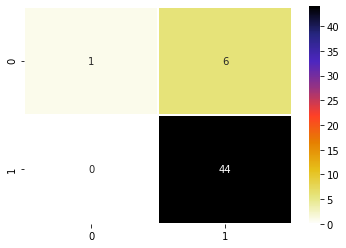

In [49]:
conf_matrix = confusion_matrix(y_pred=y_pred,y_true=y_test)
sns.heatmap(conf_matrix,annot=True,linewidths=1.5,cmap="CMRmap_r")

In [50]:
conf_matrix

array([[ 1,  6],
       [ 0, 44]])

* Just as we expected, model predicted vegetarian foods great, but when the food was non vegetarian, model was confused. 
* It happened because of unbalanced data. If we have more non-vegetarian food, our model would have predicted better.

# Conclusion

Thanks for your attention. If you have any question in your mind, please ask me. I will definetely return to you.

Have a good day!